In [129]:

SIZE = [  # even blocks: big drop of water (12µL), odd blocks: small drop (5.5µL). F01 + F03 two first sessions are bad (LV laaaaag).
# 'RatF01_2022_05_09_17_21_29', 
# 'RatF01_2022_05_10_15_13_40', 
# 'RatF01_2022_05_11_15_41_19', 
'RatF01_2022_05_12_15_16_48', 
# 'RatF02_2022_05_09_17_22_11', 
# 'RatF02_2022_05_10_15_14_16', 
# 'RatF02_2022_05_11_15_41_49', 
'RatF02_2022_05_12_15_17_16', 
# 'RatF03_2022_05_09_16_07_28', 
# 'RatF03_2022_05_10_13_57_14', 
# 'RatF03_2022_05_11_14_39_15', 
'RatF03_2022_05_12_14_13_06', 
# 'RatM03_2022_05_09_16_08_45', 
# 'RatM03_2022_05_10_13_58_02', 
# 'RatM03_2022_05_11_14_40_10', 
'RatM03_2022_05_12_14_13_44'
]

# same experiment. but water bottle was given for 90 minutes, 3 hours before the test.  
waterbefore = [
'RatF01_2022_05_13_16_37_59', 
'RatF02_2022_05_13_16_38_30', 
'RatF03_2022_05_13_15_36_21', 
'RatM03_2022_05_13_15_36_50']


# # ----------------------------------------------------------------
# # print sessions
# animalList = [os.path.basename(path) for path in sorted(glob.glob(root+"/Rat*"))]
# for animal in animalList:
#         for session in sorted([os.path.basename(expPath) for expPath in glob.glob(root+os.sep+animal+os.sep+"Experiments"+os.sep+"Rat*")]):
#                         print("'"+session+"', ")


# Import all the libraries that we will need 

In [109]:
import copy
import csv
import dabest
import datetime
import fnmatch
import glob
from IPython.display import Image, display, clear_output
import itertools
from itertools import groupby
import matplotlib.cbook
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
%matplotlib inline
import multiprocessing
import numpy as np
import os
import pandas as pd
import pickle
import platform
from pylab import rcParams
import re
import scipy
from scipy import stats
from scipy.ndimage import gaussian_filter as smooth
from scipy.signal import find_peaks
import statistics
import sys
import time
import warnings
matplotlib.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
startTimeNotebook = datetime.datetime.now()

# Define data path.

In [110]:
###Set the notebook screen ratio for jupyter
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:85% !important; }</style>"))

#### Define folder with data 
if platform.system()=='Linux':
    root="/home/david/Desktop/SIZE"
    savePath="/home/david/Desktop/Save"
else: #mac: if platform.system()=='Darwin':
    root="/Users/tom/Desktop/DATA"#AET-2/test1203"#Desktop/DATARUN_ANALYSIS/test0826"#" #current : test0826
    savePath="/Users/tom/Desktop/Save"#os.path.join(root,"ALLRATS","Fig")
print("Path to data is: %s"%root)

retval = os.getcwd()
print("Current working directory: %s" % retval)#print("Notebook Path: ", notebookPath)
print("Save Path: ", savePath)   

lickBug = []#'RatF01 RatF01_2021_07_21_16_21_18'
notfixed = ['RatM02 RatM02_2021_07_18_17_13_11', 'RatF00 RatF00_2021_08_19_13_14_34', 'RatF00 RatF00_2021_08_19_15_40_01', 'RatF01 RatF01_2021_07_21_16_21_18', 'RatF00 RatF00_2021_07_21_10_43_27', 'RatF00 RatF00_2021_07_21_15_19_33']
F00lostTRACKlick = ['RatF00 RatF00_2021_08_20_10_49_54', 'RatF00 RatF00_2021_08_20_15_40_51']
buggedRatSessions = ['RatF00 RatF00_2021_07_19_13_12_15']
boundariesBug = [["RatF00 RatF00_2021_07_19_15_25_33", [40, 20]], ["RatF01 RatF01_2021_07_19_11_09_43", [40,20]], ['RatM02 RatM02_2021_08_19_12_34_15', [35, 17]], ['RatM02 RatM02_2021_08_19_12_34_15', [35, 17]], ['RatM02 RatM02_2021_08_19_12_34_15', [35, 17]], ['RatF00 RatF00_2021_08_18_11_11_19', [75, 22]], ['RatF02 RatF02_2021_08_18_18_08_44', [75, 20]], ['RatF02 RatF02_2021_08_19_17_42_46', [40, 18]], ['RatF02 RatF02_2021_07_18_17_11_30', [75, 23]], ['RatF02 RatF02_2021_07_21_12_46_49', [43, 21]], ['RatF02 RatF02_2021_07_23_17_08_21', [75, 25]], ['RatF02 RatF02_2021_07_26_12_27_04', [40, 22]], ['RatF00 RatF00_2021_07_20_10_09_39', [100, 20]], ['RatF00 RatF00_2021_07_21_10_43_27', [40, 20]], ['RatF00 RatF00_2021_07_21_15_19_33', [40, 20]], ['RatF00 RatF00_2021_07_23_10_38_43', [75, 25]], ['RatF00 RatF00_2021_07_23_15_04_12', [75, 25]], ['RatF00 RatF00_2021_07_24_10_49_55', [100, 25]], ['RatF00 RatF00_2021_07_25_10_54_14', [75, 25]], ['RatF00 RatF00_2021_07_25_15_38_20', [75, 25]], ['RatF00 RatF00_2021_07_26_15_17_06', [45, 22]], ]
runstaysepbug = ['RatF00 RatF00_2021_07_18_10_36_33', 'RatM01 RatM01_2021_07_18_11_40_37', 'RatM01 RatM01_2021_07_18_16_12_12', 'RatM01 RatM01_2021_07_19_16_28_01', 'RatM00 RatM00_2021_08_19_15_40_49', 'RatF01 RatF01_2021_08_19_11_09_37', 'RatM02 RatM02_2021_07_21_12_48_07', 'RatM02 RatM02_2021_07_21_17_25_04', 'RatM02 RatM02_2021_07_25_17_37_53', 'RatM02 RatM02_2021_07_26_12_28_45', 'RatM02 RatM02_2021_07_26_17_21_19', 'RatM01 RatM01_2021_07_21_11_46_29', 'RatM01 RatM01_2021_07_26_11_26_38', 'RatM01 RatM01_2021_07_26_16_19_55', 'RatM00 RatM00_2021_07_21_10_45_30', 'RatM00 RatM00_2021_07_26_10_25_22', 'RatM00 RatM00_2021_07_26_15_18_23', 'RatF02 RatF02_2021_07_20_17_12_04', 'RatF00 RatF00_2021_07_20_10_09_39', 'RatF00 RatF00_2021_07_21_10_43_27', ] 

buggedSessions = lickBug, notfixed, F00lostTRACKlick, buggedRatSessions, boundariesBug, runstaysepbug

Path to data is: /home/david/Desktop/SIZE
Current working directory: /home/david/Desktop/code
Save Path:  /home/david/Desktop/Save


# Define functions

### LOAD DATA
#Data is loaded in one dictionary per variable (time, position, etc.) and have [animal, session] as keys, so we have a set of data for each session of each rat
#This cell loads all the behavioral data from the files created with labview
#data in .position is as follows (as of feb 2021): 
#[0:2]: Step of the experiment, e.g. "Session 1 ON". Takes 3 columns because of the spaces.
#[3]: Time at which the LV iteration has been done. Depends on the acquisition frequency, clock adds 0.04s at each iteration. 
#[4]: POSITION DATA : Position on the X axis (length of the treadmill) of the animal's centroid. This position is in pixels, it needs to be converted into cm using the datapxtocm function. The conversion (11px = 1cm) has been determined in LabView as a result of a calibration to counteract the lens distorsion generated with the camera.
#[5]: Same for the position on the Y axis. 
#[6]: LICK DATA : Left hand side of the treadmill. True/1 if there is a lick False/0 if not.
#[7]: Same but Right side
#[8]: SOLENOID DATA : Same idea as just above, Left Side, but determines if the valve has been opened (might be usefull in %to get reward protocol)
#[9]: Same but Right Side valve.
#[10]: BUFFER DATA : #ID of the frame that has been analyzed by LabView in this iteration, used to check if there is acquisition bugs, difference between two consecutive frames should be == 1.
#[11]: EDITED TRACKING : True/False or 1/0 that tells wether the frame has been edited in LabView. When the animal goes too far into the sides, or when the animal rears, the tracking loses the position of the animal and places the centroid precisely at the center of the tracking area. When this happens I coded LabView to maintain the position of the centroid in the last position in which the rat was detected and resume adequate tracking when available. TLDR, eliminates the jitter when tracking is not working properly. 

### LOAD PARAMETERS
#Parameters are loaded from behav_param file for each [animal, session] in a Dict
#sessionDuration : duration of the session 
#acqPer : number of acquisition per second in labview // not used anymore (acqPer -> delta between Time value of two consecutive frames)
#waterLeft : (weight of the measuring cup + 10 drops of water - weight of the cup) --> Weight of 10 drops on the Left, in grams. divide by 10 to have weight of a drop, multiply by 1000 to have value in µL  
#waterRight : idem on right  
#weight : Weight of each rat just before the session 
#lastWeightadlib : Weight of each rat when the water bottles are removed
#lastDayadlib : Last day with ad lib water
#daysSinceadlib : compute the number of days have elapsed since "lastDayadlib"
#boundaries : initialise the boundary array, that is computed later
#bloc duration data
#probability of getting reward on each side for eeach bloc
#treadmill speed for each block

In [146]:
%run VIGOR-Functions.py


<Figure size 432x288 with 0 Axes>

# COMPUTE

In [132]:
p = {}
from multiprocessing import Array
animalList = [os.path.basename(path) for path in sorted(glob.glob(root+"/Rat*"))]
#for animal in animalList:# animal, index, redoFig, printFigs, redoMask
#    processData(           animal, index, True,    False,     False,  )
progress = Array('d', np.zeros(len(animalList)))
for index, animal in enumerate(animalList):                       # progress, animal, sessions loop through /or[] ,                    index,                 redo ,redoFigs, printFigs, redoMask
    p[animal] = multiprocessing.Process(target = processData, args=(progress, root, animal, matchsession(animal, waterbefore), index, buggedSessions, False, False,    False,     False,  ))
for index, animal in enumerate(animalList):
    p[animal].start()
for index, animal in enumerate(animalList):
    p[animal].join()


RatF01                                                            __QQ                                                                                                                                                                                    Progress: [                                                   ~~~(_)_">] 100% Done ✓ 

RatF02                                                            __QQ                                                                                                                                                                                    Progress: [                                                   ~~~(_)_">] 100% Done ✓ 

RatF03                                                            __QQ                                                                                                                                                                                    Progress: [                                                   ~~~(_)_">] 100

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

In [113]:
endTimeNotebook = datetime.datetime.now()
timeExecutionNotebook = endTimeNotebook-startTimeNotebook
print(timeExecutionNotebook)

0:00:00.694100


# Accross session plots 

In [133]:
params = {}
smoothMask = {}
nb_runsBin = {}
rat_markers = {}
speedRunToLeftBin, speedRunToRightBin = {}, {}
timeRunToLeftBin, timeRunToRightBin = {}, {}
maxSpeedLeftBin, maxSpeedRightBin = {}, {}
timeStayInLeftBin, timeStayInRightBin = {}, {}
totalDistance, totalWater, total_trials = {}, {}, {}
XtrackRunToLeftBin, XtrackRunToRightBin = {}, {}
instantSpeedLeftBin, instantSpeedRightBin = {}, {}
trackTimeToLeftBin, trackTimeToRightBin = {}, {}
sequence = {}

palette = {'RatF00': (0.4, 0.0, 0.0), 'RatF01': (0.55, 0.13, 0.13), 'RatF02': (0.8, 0.2, 0.2), 'RatF03': (1, 0.6, 0.6),
            'RatM00': (0.0, 0.4, 0.0), 'RatM01': (0.13, 0.55, 0.13), 'RatM02': (0.2, 0.8, 0.2), 'RatM03': (0.6, 1.0, 0.6)}
brainstatus = {'RatF00': 'normal', 'RatF01': 'lesion', 'RatF02': 'normal', 'RatF03': 'lesion',
               'RatM00': 'normal', 'RatM01': 'normal', 'RatM02': 'normal', 'RatM03': 'normal'}

animalList = [os.path.basename(path) for path in sorted(glob.glob(root+"/Rat*"))]
for index, animal in enumerate(animalList):
    print(animal)
    if fnmatch.fnmatch(animal, 'RatF*'): rat_markers[animal]=[palette[animal], "$\u2640$", brainstatus_plot(brainstatus[animal])]
    elif fnmatch.fnmatch(animal, 'RatM*'): rat_markers[animal]=[palette[animal], "$\u2642$", brainstatus_plot(brainstatus[animal])]
    elif fnmatch.fnmatch(animal, 'Rat00*'): rat_markers[animal]=[(0.0, 0.0, 0.0), "$\u2426$", brainstatus_plot(brainstatus[animal])]
    else: print("error, this is not a rat you got here")

    for session in sorted(matchsession(animal, SIZE+waterbefore)):
        params[animal, session]     = get_from_pickle(root, animal, session, name="params.p")
        smoothMask[animal, session] = get_from_pickle(root, animal, session, name="mask.p")
        nb_runsBin[animal, session] = get_from_pickle(root, animal, session, name="nbRuns.p")
        speedRunToLeftBin[animal, session],  speedRunToRightBin[animal, session]  = get_from_pickle(root, animal, session, name="avgSpeed.p")
        maxSpeedLeftBin[animal, session],    maxSpeedRightBin[animal, session]    = get_from_pickle(root, animal, session, name="maxSpeed.p")
        timeStayInLeftBin[animal, session],  timeStayInRightBin[animal, session]  = get_from_pickle(root, animal, session, name="timeinZone.p")
        timeRunToLeftBin[animal, session],   timeRunToRightBin[animal, session]   = get_from_pickle(root, animal, session, name="timeRun.p")
        XtrackRunToLeftBin[animal, session], XtrackRunToRightBin[animal, session] = get_from_pickle(root, animal, session, name="trackPos.p")
        instantSpeedLeftBin[animal, session],instantSpeedRightBin[animal, session]= get_from_pickle(root, animal, session, name="trackSpeed.p")
        trackTimeToLeftBin[animal, session], trackTimeToRightBin[animal, session] = get_from_pickle(root, animal, session, name="trackTime.p")
        totalDistance[animal, session],      totalWater[animal, session], total_trials[animal, session] = get_from_pickle(root, animal, session, name="misc.p")
        sequence[animal, session] = get_from_pickle(root, animal, session, name="test.p")

data60, data90, data120 = separate_data(animalList, SIZE, XtrackRunToLeftBin, XtrackRunToRightBin, 'Distance', params, 'avgrunspeed', True)
datat60, datat90, datat120 = separate_data(animalList, SIZE, trackTimeToLeftBin, trackTimeToRightBin, 'Distance', params, 'avgrunspeed', True)
sdata60, sdata90, sdata120 = separate_data(animalList, SIZE, instantSpeedLeftBin, instantSpeedRightBin, 'Distance', params, 'avgrunspeed', True)
sdatat60, sdatat90, sdatat120 = separate_data(animalList, SIZE, trackTimeToLeftBin, trackTimeToRightBin, 'Distance', params, 'avgrunspeed', True)


# data60w, data90w, data120w = separate_data(animalList, waterbefore, XtrackRunToLeftBin, XtrackRunToRightBin, 'Distance', params, 'avgrunspeed', True)
# datat60w, datat90w, datat120w = separate_data(animalList, waterbefore, trackTimeToLeftBin, trackTimeToRightBin, 'Distance', params, 'avgrunspeed', True)
sdata60w, sdata90w, sdata120w = separate_data(animalList, waterbefore, instantSpeedLeftBin, instantSpeedRightBin, 'Distance', params, 'avgrunspeed', True)
sdatat60w, sdatat90w, sdatat120w = separate_data(animalList, waterbefore, trackTimeToLeftBin, trackTimeToRightBin, 'Distance', params, 'avgrunspeed', True)


RatF01
RatF02
RatF03
RatM03


/home/david/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


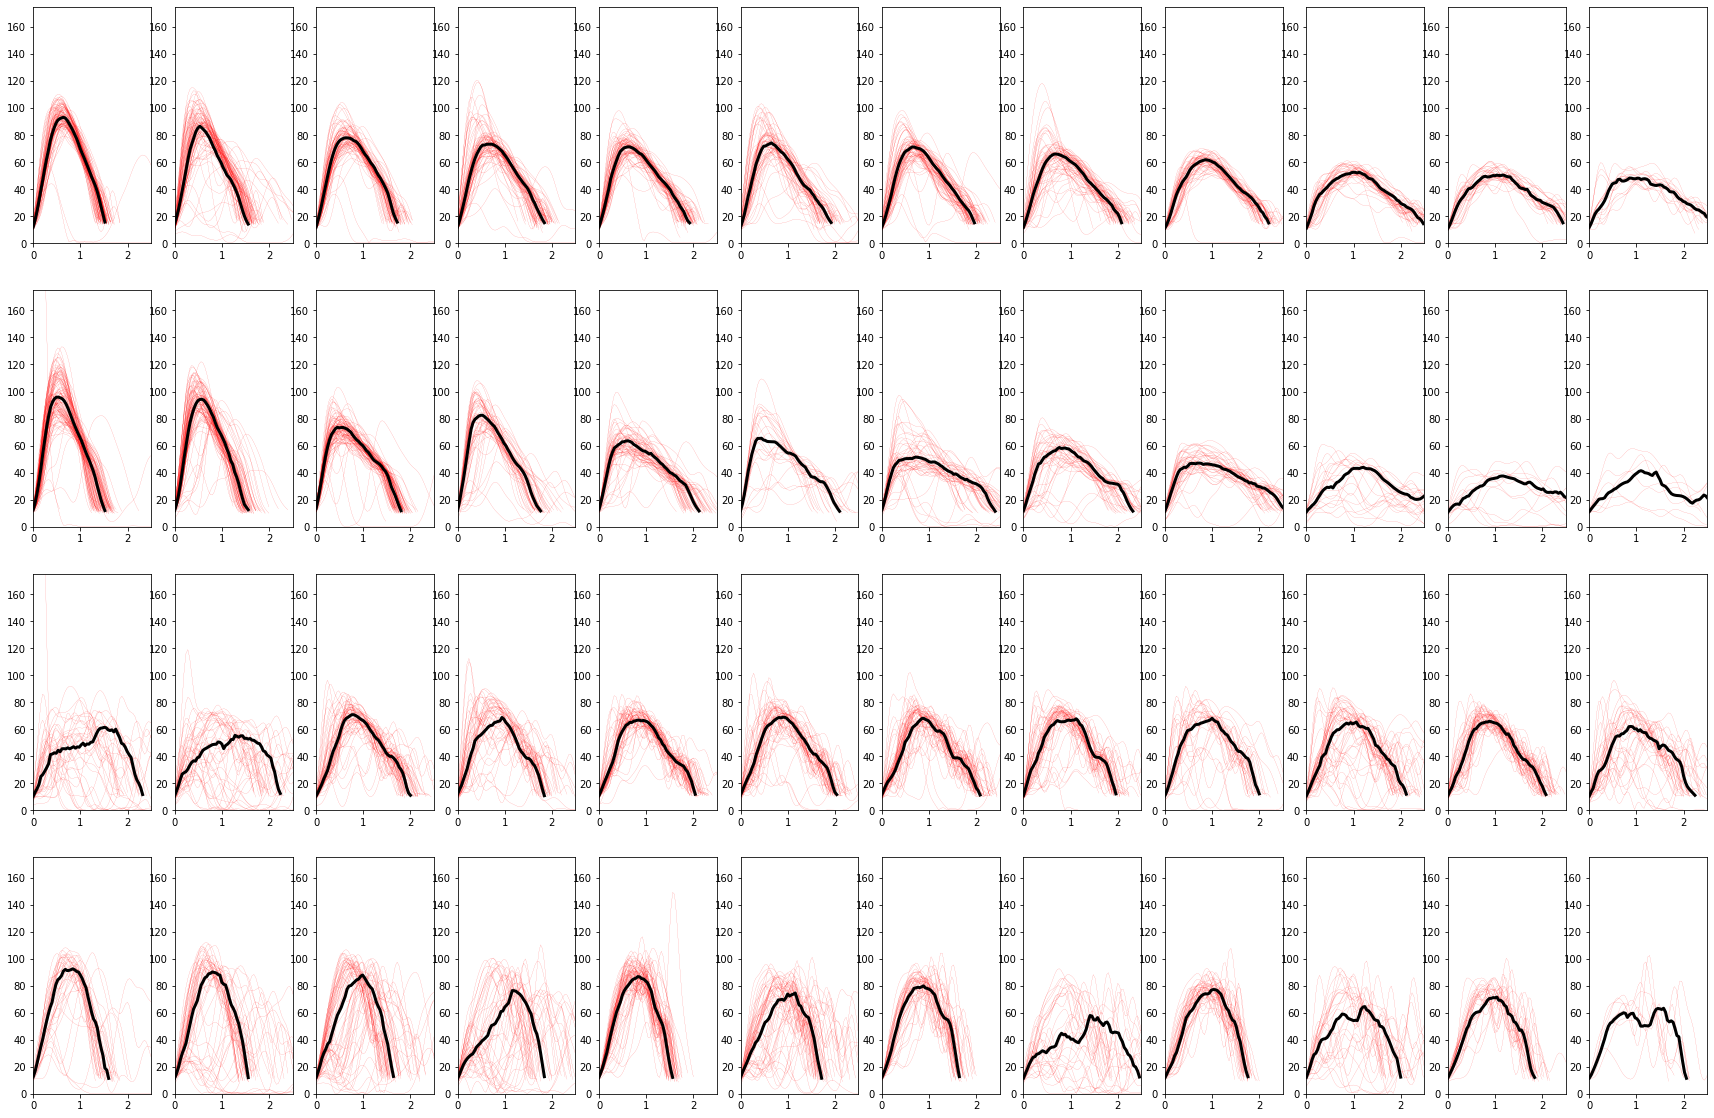

In [134]:
fig = plt.figure(constrained_layout = False, figsize=(30, 20))
lesionanimalList = ['RatF01', 'RatF02', 'RatF03', 'RatM03']
gs = fig.add_gridspec(len(lesionanimalList), 12)
for index, animal in enumerate(lesionanimalList):
    gs00 = gs[index, 0:12].subgridspec(1,12)
    for i in range(0, 12):
        axs= fig.add_subplot(gs00[0, i])
        axs.set_xlim(0, 2.5)
        axs.set_ylim(0, 175)
        try:
            for k, l in zip(sdatat120[animal][i],sdata120[animal][i]):plt.plot(k-k[0],l, c='r', lw=0.1)
            time, traj = compute_median_trajectory(sdata120[animal][i], sdatat120[animal][i])
            ax = plt.plot(time, traj, color= 'k', lw=3, alpha=1) 
        except: IndexError

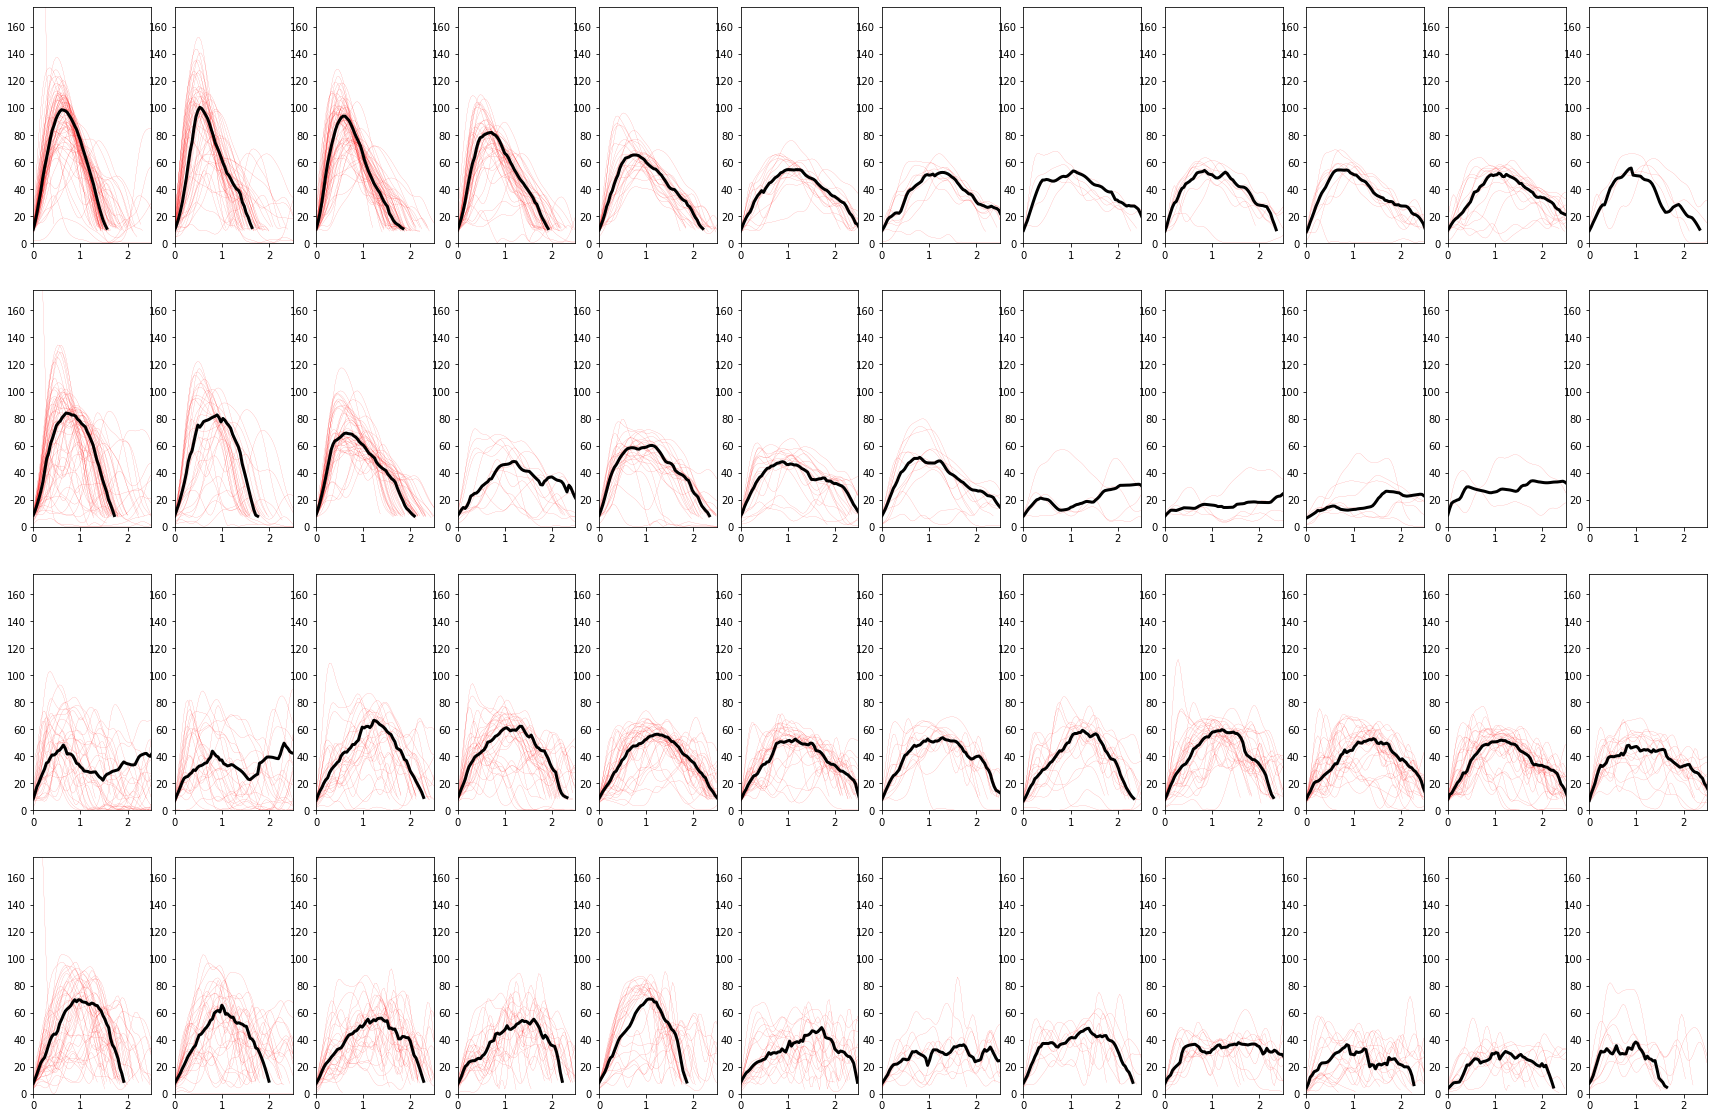

In [135]:
fig = plt.figure(constrained_layout = False, figsize=(30, 20))
lesionanimalList = ['RatF01', 'RatF02', 'RatF03', 'RatM03']
gs = fig.add_gridspec(len(lesionanimalList), 12)
for index, animal in enumerate(lesionanimalList):
    gs00 = gs[index, 0:12].subgridspec(1,12)
    for i in range(0, 12):
        axs= fig.add_subplot(gs00[0, i])
        axs.set_xlim(0, 2.5)
        axs.set_ylim(0, 175)
        try:
            for k, l in zip(sdatat120w[animal][i],sdata120w[animal][i]):plt.plot(k-k[0],l, c='r', lw=0.1)
            time, traj = compute_median_trajectory(sdata120w[animal][i], sdatat120w[animal][i])
            ax = plt.plot(time, traj, color= 'k', lw=3, alpha=1) 
        except: IndexError

In [116]:
#index, start action, type action, getrwd?, duration, distance

animal, session = "RatF02", "RatF02_2022_05_12_15_17_16"
dict(list(sequence[animal, session].items())[860:870])

{860: (1853.56, 'run', 1, 2.400000000000091, 37.10562692293832),
 861: (1856.0, 'stay', 0, 2.0799999999999272, 'wait'),
 862: (1858.12, 'run', 1, 2.7600000000002183, -33.57186411665434),
 863: (1860.92, 'stay', 0, 2.1599999999998545, 'wait'),
 864: (1863.12, 'run', 1, 2.6400000000001, 35.03824414924898),
 865: (1865.8, 'stay', 0, 2.400000000000091, 'wait'),
 866: (1868.24, 'run', 0, 6.0, -11.331075358500167),
 867: (1874.28, 'stay', 1, 8.519999999999982, 'wait'),
 868: (1882.84, 'run', 1, 1.759999999999991, 53.76579079901368),
 869: (1884.64, 'stay', 0, 3.2799999999999727, 'wait')}

In [117]:
def bin_seq(seq):
    prevblock = 0
    index = 0
    binseq = {k:{} for k in [_ for _ in range(0,12)]}
    for i in range(0, len(seq)): 
        if get_block(seq[i][0]) != prevblock: index = i  # if change block (next block) store action# to reset first action of next block to 0
        binseq[get_block(seq[i][0])][i-index] = seq[i]
        prevblock = get_block(seq[i][0])
    return binseq

def compute_median(ydata, xdata, cutoff):
    try : maxL = np.nanmax([len(j) for j in xdata]) # determine maximum lenght of run
    except TypeError: maxL = 1
    except ValueError: maxL = 1
    avgPos = np.ones((len(xdata), maxL))*np.nan     # initialise matrix
    for i, p in enumerate(ydata): avgPos[i, 0:len(p)] = p    # fill matrix with all run data
    nanSum = np.sum(np.isnan(avgPos), axis = 0)
    try: end = np.where(nanSum > cutoff * avgPos.shape[0])[0][0]     # cut median run after CUTOFF missing values == cut median run lenght when CUTOFF% of runs have ended
    except IndexError: end = avgPos.shape[1]
    xx = np.linspace(0, end-1, end-1)
    yy = np.nanmedian(avgPos, axis = 0)[1:end]
    return xx, yy

binseq = {}
animal, session = "RatF02", "RatF02_2022_05_12_15_17_16"
binseq[animal, session] = bin_seq(sequence[animal, session])

Found 2 matches
40.20826171449929
Found 2 matches
3.6599999999998545
Found 2 matches
2.3199999999999363


<AxesSubplot:>

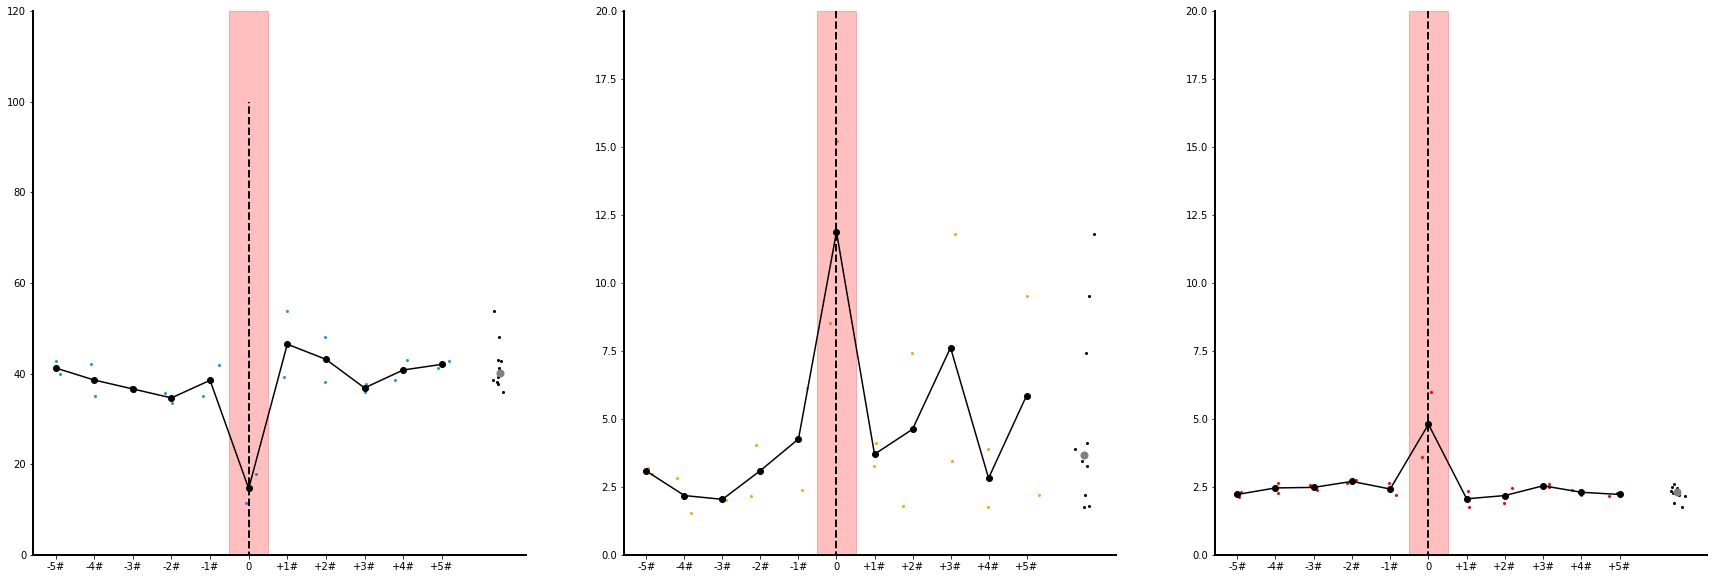

In [118]:
def find_sequence(input, target_seq):
    converted = []
    for elem in range(len(input)):
        if input[elem][1] == 'run': converted.append(input[elem][2])
        else: converted.append(" ")
    
    reward_sequence = ''.join([str(_) for _ in converted])
    max_len = len(target_seq)
    found_indices = []
    for i in range(len(reward_sequence)):
        chunk = reward_sequence[i:i+max_len+1]
        for j in range(1, len(chunk)+1):
            seq = chunk[:j]
            if seq == target_seq:
                if i>10 and i<len(reward_sequence)-20:
                    found_indices.append(i+len(seq)-1)
    print(f'Found {len(found_indices)} matches')
    return found_indices


def plot_around_indices(input, target_seq, var, ax=None):
    indices = find_sequence(input, target_seq)
    if ax is None: ax = plt.gca()
    ax.plot((0, 0), (-1, 100), c='k', ls='--', lw=2)

    yy = np.empty((len(indices), 22))
    x = np.arange(-10, 11, 1.0)[::2]
    meanvar = []

    for i, index in enumerate(indices):
        if var == "speed":
            for r in range(index-10, index+11):
                if input[r][1] == 'run':
                    ax.scatter(np.random.normal(r-index, 0.25, 1), abs(input[r][4]), c='dodgerblue', s=4)
                    yy[i][r-index+10] = abs(input[r][4])
            for r in range(index+1, index+11):
                if input[r][1] == 'run':
                    meanvar.append(abs(input[r][4]))
            y = np.median(yy, axis=0)[::2]
            ax.set_ylim(0, 120)
            
        if var == "wait":
            for r in range(index-10, index+12):
                if input[r][1] == 'stay':
                    ax.scatter(np.random.normal(r-index-1, 0.25, 1), input[r][3], c='orange', s=4)
                    yy[i][r-index+10] = input[r][3]
            for r in range(index+2, index+12):
                if input[r][1] == 'stay':
                    meanvar.append(input[r][3])
            y = np.median(yy, axis=0)[1::2]
            ax.set_ylim(0, 20)

        if var == "run":
            for r in range(index-10, index+11):
                if input[r][1] == 'run':
                    ax.scatter(np.random.normal(r-index, 0.25, 1), input[r][3], c='red', s=4)
                    yy[i][r-index+10] = input[r][3]
            for r in range(index+1, index+11):
                if input[r][1] == 'run':
                    meanvar.append(abs(input[r][3]))
            y = np.median(yy, axis=0)[::2]
            ax.set_ylim(0, 20)

    # axvspan previous runs rewarded
    a, b = 0, 2
    m = len(target_seq)+1
    _ = [-i for i in range(-1, m)][::-1]
    for yn in target_seq:
        if yn != " ": ax.axvspan(_[a], _[b], color='g' if yn == "1" else 'r', alpha=0.25,)
        a += 1
        b += 1

    # average of next 5 items
    ax.scatter(np.random.normal(13, 0.25, len(meanvar)), meanvar, c='k', s=4)
    ax.scatter(13, np.nanmedian(meanvar), c='gray', s=50)

    print(np.nanmedian(meanvar))
    ax.plot(x, y, c='k', marker='o')  

    ax.set_xticks(np.arange(-10, 11, 2.0))
    ax.set_xticklabels(["-5#", "-4#", "-3#", "-2#", "-1#", 0, "+1#", "+2#", "+3#", "+4#", "+5#"])
    ax.spines['top'].set_color("none")
    ax.spines['right'].set_color("none")
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    return ax

fig, axs = plt.subplots(1, 3, figsize=(30,10))
data = sequence[animal, session]
#data = binseq[animal, session][0]
#target = "0 1"
target = "0"
#target = "1"

plot_around_indices(data, target, "speed", axs[0])
plot_around_indices(data, target, "wait", axs[1])
plot_around_indices(data, target, "run", axs[2])

In [122]:
matchsession(animal, SIZE)

['RatF01_2022_05_12_15_16_48']

In [121]:
animalList

['RatF01', 'RatF02', 'RatF03', 'RatM03']

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

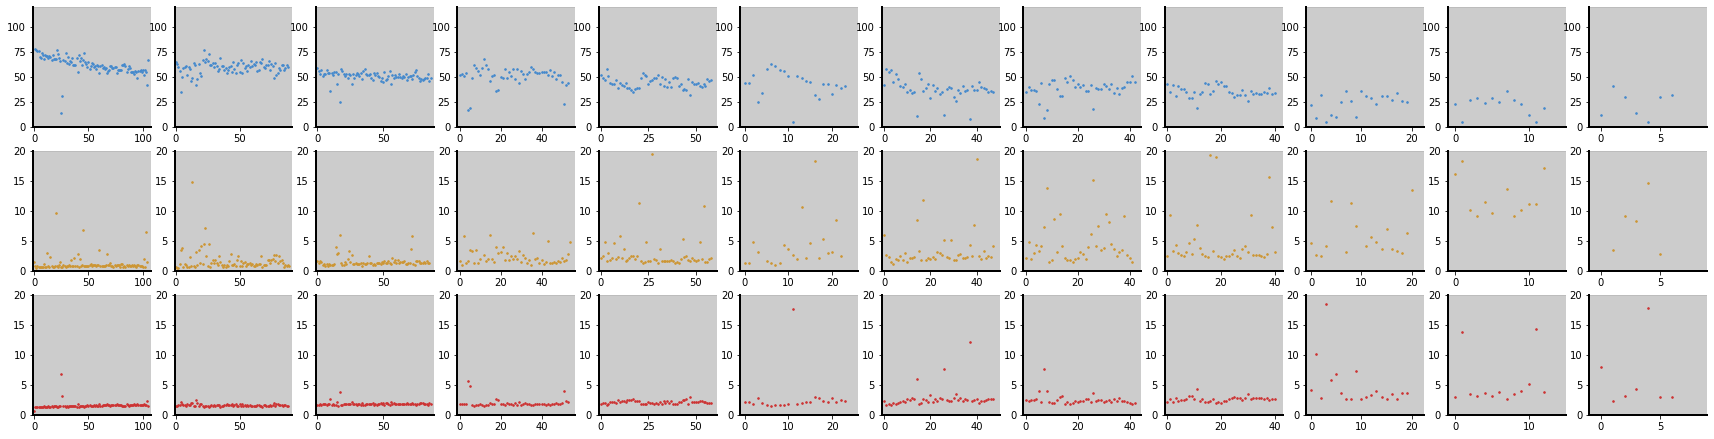

In [ ]:

def plot_seq_session(input, var, rewardprobablock, ax=None):
    for bin in [_ for _ in range(0,12)]: 
        xmax = len(input[bin])/2+2
        ax[bin].axvspan(-1, 150, color='grey', alpha=rewardprobablock[bin]/250, zorder=1)
        y = []
        x = []
        c = 0
        for a in range(0, len(input[bin])):
            if var == "speed":
                if input[bin][a][1] == "run":
                    x.append(c)
                    y.append(abs(input[bin][a][4]))
                    c+=1
                    ax[bin].set_ylim(0,120)
                    color = 'dodgerblue'
            if var == "wait":
                if input[bin][a][1] == "stay":
                    x.append(c)
                    y.append(input[bin][a][3])
                    c+=1
                    ax[bin].set_ylim(0,20)
                    color = 'orange'
            if var == "run":
                if input[bin][a][1] == "run":
                    x.append(c)
                    y.append(input[bin][a][3])
                    c+=1
                    ax[bin].set_ylim(0,20)
                    color = 'red'
            if var == "dist":
                if input[bin][a][1] == "run":
                    x.append(c)
                    y.append(input[bin][a][3]*abs(input[bin][a][4]))
                    c+=1
                    ax[bin].set_ylim(80,120)
                    color = 'k'
                    
        ax[bin].set_xlim(-1, xmax)
        ax[bin].scatter(x, y, c=color, s=2.5)
        # gradient, intercept, r_value, p_value, std_err = stats.linregress(x, y)
        # ax[bin].plot(np.linspace(np.min(x), np.max(x), 500), gradient * np.linspace(np.min(x), np.max(x), 500) + intercept, color='k', lw=2)
        ax[bin].spines['top'].set_color("none")
        ax[bin].spines['right'].set_color("none")
        ax[bin].spines['bottom'].set_linewidth(2)
        ax[bin].spines['left'].set_linewidth(2)
    return ax


fig, axs = plt.subplots(3, 12, figsize=(30,7.5))
animal, session = 'RatF02', 'RatF02_2022_05_12_15_17_16'
binseq[animal, session] = bin_seq(sequence[animal, session])
plot_seq_session(binseq[animal, session], "speed", params[animal, session]['rewardProbaBlock'], ax=axs[0])
plot_seq_session(binseq[animal, session], "wait", params[animal, session]['rewardProbaBlock'], ax=axs[1])
plot_seq_session(binseq[animal, session], "run", params[animal, session]['rewardProbaBlock'], ax=axs[2])
#plot_seq_session(binseq[animal, session], "dist", params[animal, session]['rewardProbaBlock'], ax=axs[3])

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

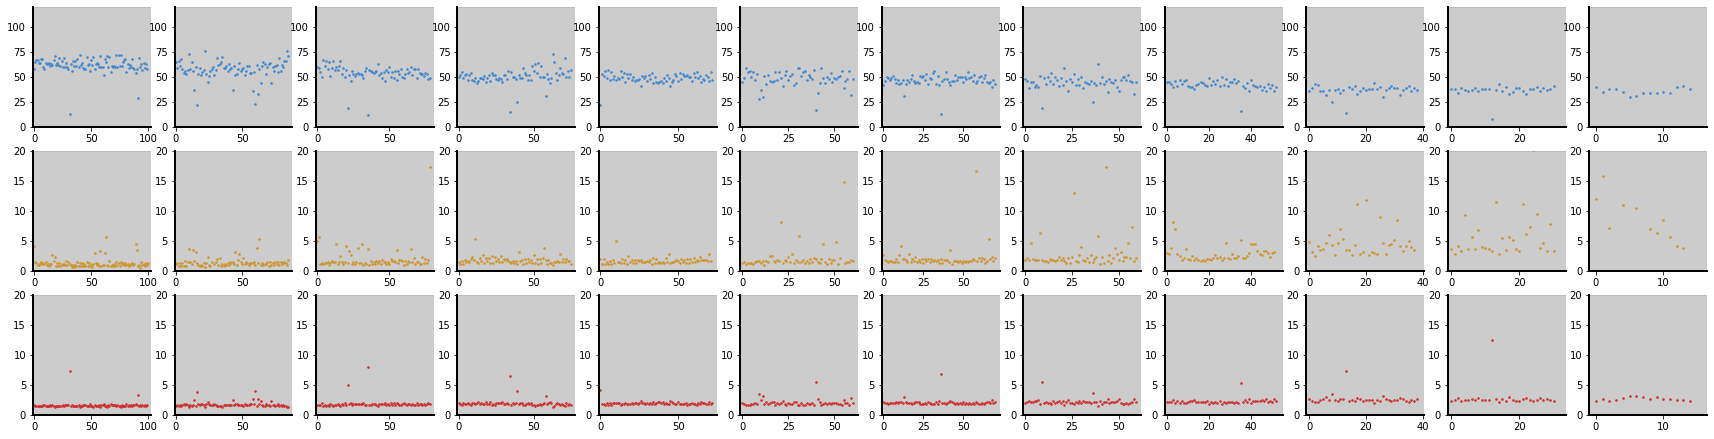

In [ ]:
fig, axs = plt.subplots(3, 12, figsize=(30,7.5))
animal, session = 'RatF01', 'RatF01_2022_05_12_15_16_48'
binseq[animal, session] = bin_seq(sequence[animal, session])
plot_seq_session(binseq[animal, session], "speed", params[animal, session]['rewardProbaBlock'], ax=axs[0])
plot_seq_session(binseq[animal, session], "wait", params[animal, session]['rewardProbaBlock'], ax=axs[1])
plot_seq_session(binseq[animal, session], "run", params[animal, session]['rewardProbaBlock'], ax=axs[2])

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

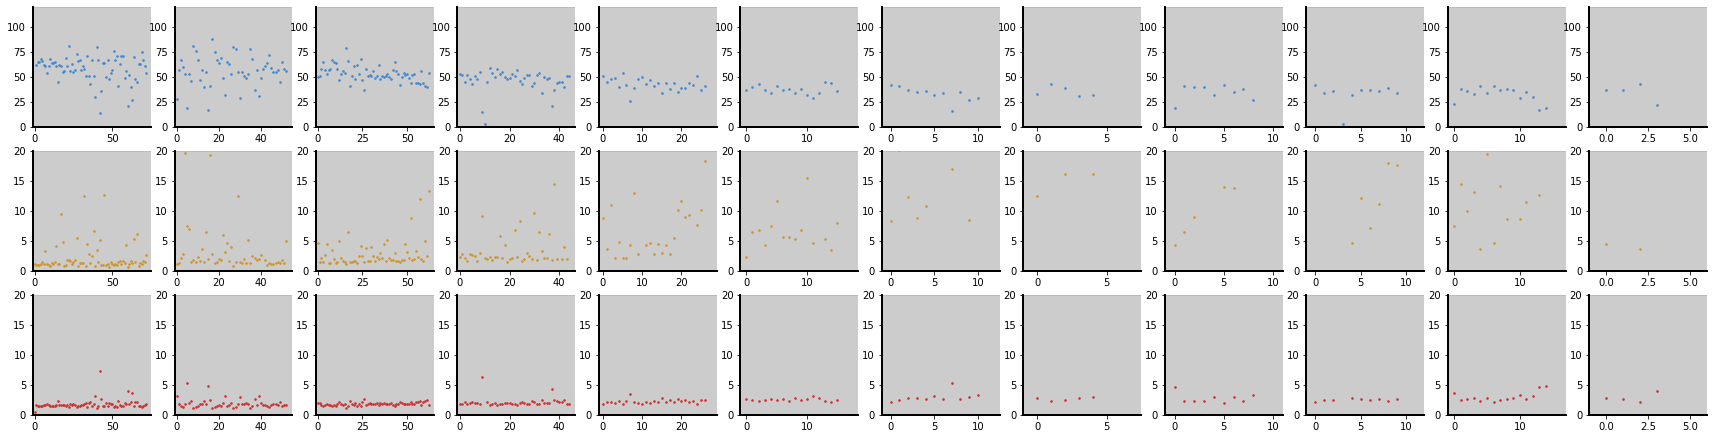

In [136]:
fig, axs = plt.subplots(3, 12, figsize=(30,7.5))
animal, session = 'RatF01', 'RatF01_2022_05_13_16_37_59'
binseq[animal, session] = bin_seq(sequence[animal, session])
plot_seq_session(binseq[animal, session], "speed", params[animal, session]['rewardProbaBlock'], ax=axs[0])
plot_seq_session(binseq[animal, session], "wait", params[animal, session]['rewardProbaBlock'], ax=axs[1])
plot_seq_session(binseq[animal, session], "run", params[animal, session]['rewardProbaBlock'], ax=axs[2])

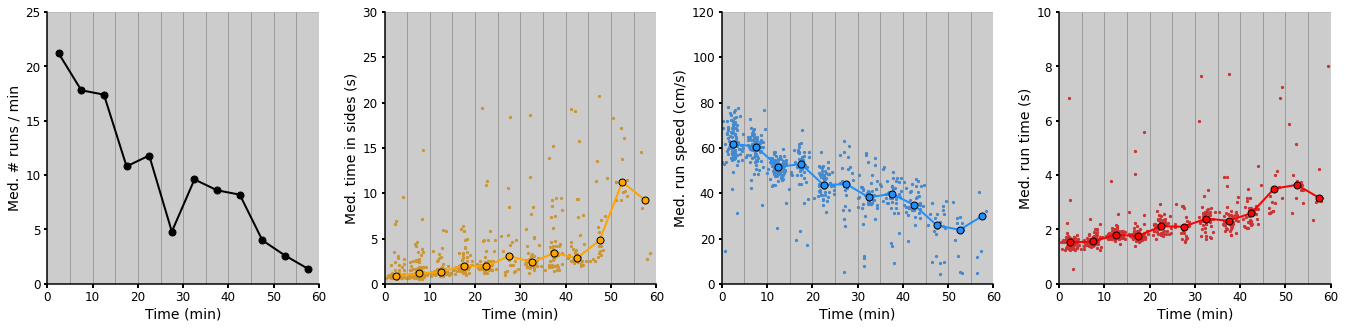

In [147]:
aaa, sss = 'RatF02', 'RatF02_2022_05_12_15_17_16'
fig = plt.figure(constrained_layout = False, figsize=(23, 5))
gs = fig.add_gridspec(5, 23)
stat = "Med. " #"Avg. "
ax70 = fig.add_subplot(gs[0:5, 0:5])
ax70 = plot_figBin([nb_runsBin[aaa, sss][i]/5 for i in range(0, 12)], params[aaa, sss]['rewardProbaBlock'], params[aaa, sss]['blocks'], barplotaxes = [0, params[aaa, sss]['sessionDuration']/60, 0, 25], color = ['k'], xyLabels=["Time (min)", "\u0023 runs / min", 14, 12], title=["", 16], linewidth = [1.5], stat=stat);

ax72 = fig.add_subplot(gs[0:5, 6:11])
ax72 = plot_figBin([timeStayInLeftBin[aaa, sss][i]+timeStayInRightBin[aaa, sss][i] for i in range(0, 12)], params[aaa, sss]['rewardProbaBlock'], params[aaa, sss]['blocks'], barplotaxes = [0, params[aaa, sss]['sessionDuration']/60, 0, 30], color = ['orange'], xyLabels=["Time (min)","time in sides (s)", 14, 12], title=["", 16], linewidth = [1.5], scatter=True, stat=stat);

ax74 = fig.add_subplot(gs[0:5, 12:17])
ax74 = plot_figBin([speedRunToLeftBin[aaa, sss][i]+speedRunToRightBin[aaa, sss][i] for i in range(0, 12)], params[aaa, sss]['rewardProbaBlock'], params[aaa, sss]['blocks'], barplotaxes = [0, params[aaa, sss]['sessionDuration']/60, 0, 120], color = ['dodgerblue'], xyLabels=["Time (min)","run speed (cm/s)", 14, 12], title=["", 16], linewidth = [1.5], scatter=True, stat=stat);

ax76 = fig.add_subplot(gs[0:5, 18:23])
ax76 = plot_figBin([timeRunToLeftBin[aaa, sss][i]+timeRunToRightBin[aaa, sss][i] for i in range(0, 12)], params[aaa, sss]['rewardProbaBlock'], params[aaa, sss]['blocks'], barplotaxes = [0, params[aaa, sss]['sessionDuration']/60, 0, 10], color = ['red'], xyLabels=["Time (min)", "run time (s)", 14, 12], title=["", 16], linewidth = [1.5], scatter=True, stat=stat);



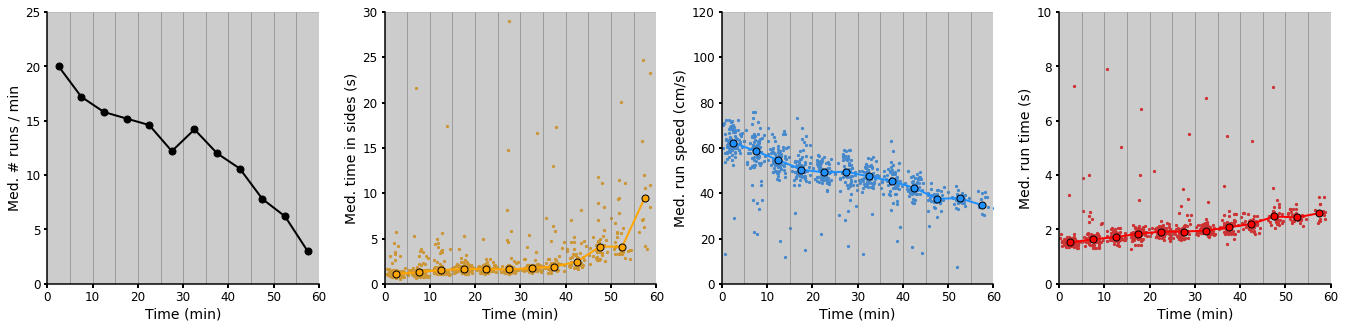

In [148]:
aaa, sss =  'RatF01', 'RatF01_2022_05_12_15_16_48'
fig = plt.figure(constrained_layout = False, figsize=(23, 5))
gs = fig.add_gridspec(5, 23)
stat = "Med. " #"Avg. "
ax70 = fig.add_subplot(gs[0:5, 0:5])
ax70 = plot_figBin([nb_runsBin[aaa, sss][i]/5 for i in range(0, 12)], params[aaa, sss]['rewardProbaBlock'], params[aaa, sss]['blocks'], barplotaxes = [0, params[aaa, sss]['sessionDuration']/60, 0, 25], color = ['k'], xyLabels=["Time (min)", "\u0023 runs / min", 14, 12], title=["", 16], linewidth = [1.5], stat=stat);

ax72 = fig.add_subplot(gs[0:5, 6:11])
ax72 = plot_figBin([timeStayInLeftBin[aaa, sss][i]+timeStayInRightBin[aaa, sss][i] for i in range(0, 12)], params[aaa, sss]['rewardProbaBlock'], params[aaa, sss]['blocks'], barplotaxes = [0, params[aaa, sss]['sessionDuration']/60, 0, 30], color = ['orange'], xyLabels=["Time (min)","time in sides (s)", 14, 12], title=["", 16], linewidth = [1.5], scatter=True, stat=stat);

ax74 = fig.add_subplot(gs[0:5, 12:17])
ax74 = plot_figBin([speedRunToLeftBin[aaa, sss][i]+speedRunToRightBin[aaa, sss][i] for i in range(0, 12)], params[aaa, sss]['rewardProbaBlock'], params[aaa, sss]['blocks'], barplotaxes = [0, params[aaa, sss]['sessionDuration']/60, 0, 120], color = ['dodgerblue'], xyLabels=["Time (min)","run speed (cm/s)", 14, 12], title=["", 16], linewidth = [1.5], scatter=True, stat=stat);

ax76 = fig.add_subplot(gs[0:5, 18:23])
ax76 = plot_figBin([timeRunToLeftBin[aaa, sss][i]+timeRunToRightBin[aaa, sss][i] for i in range(0, 12)], params[aaa, sss]['rewardProbaBlock'], params[aaa, sss]['blocks'], barplotaxes = [0, params[aaa, sss]['sessionDuration']/60, 0, 10], color = ['red'], xyLabels=["Time (min)", "run time (s)", 14, 12], title=["", 16], linewidth = [1.5], scatter=True, stat=stat);



(-1.0, 40.0)

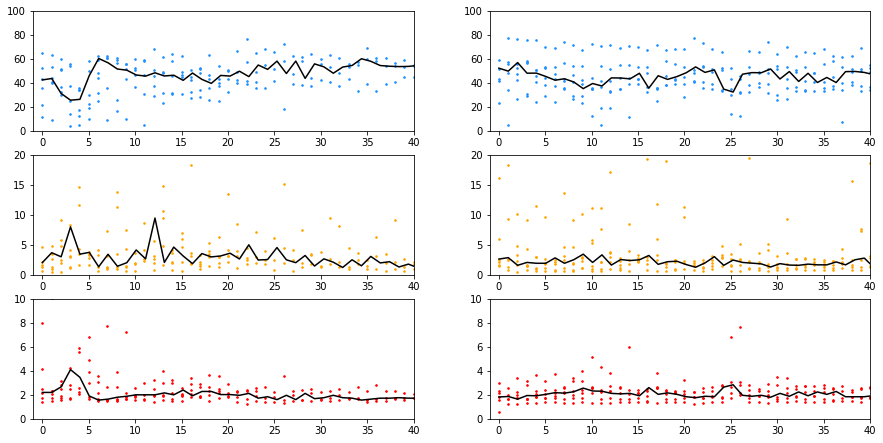

In [ ]:
# full session 
# try pool that per animal//sessiontype

fig, axs = plt.subplots(3, 2, figsize=(15,7.5))
animal, session = 'RatF02', 'RatF02_2022_05_12_15_17_16'

# wait time
waitx10, waity10 = [], []
waitx90, waity90 = [], []
for bin in [_ for _ in range(0,12)]:
    y = []
    x = []
    c = 0
    for a in range(0, len(binseq[animal, session][bin])):
        if binseq[animal, session][bin][a][1] == "stay":
            x.append(c)
            y.append(binseq[animal, session][bin][a][3])
            c+=1

    if bin %2 == 0:
        axs[1, 1].scatter(x, y, c='orange', s=2.5)
        waitx90.append(x)
        waity90.append(y)
    else:
        axs[1, 0].scatter(x, y, c='orange', s=2.5)
        waitx10.append(x)
        waity10.append(y)

# run speed
speedx10, speedy10 = [], []
speedx90, speedy90 = [], []
for bin in [_ for _ in range(0,12)]:
    y = []
    x = []
    c=0
    for a in range(0, len(binseq[animal, session][bin])):
        if binseq[animal, session][bin][a][1] == "run":
            x.append(c)
            y.append(abs(binseq[animal, session][bin][a][4]))
            c+=1

    if bin %2 == 0:
        axs[0, 1].scatter(x, y, c='dodgerblue', s=2.5)
        speedx90.append(x)
        speedy90.append(y)
    else:
        axs[0, 0].scatter(x, y, c='dodgerblue', s=2.5)
        speedx10.append(x)
        speedy10.append(y)

# run time
runx10, runy10 = [], []
runx90, runy90 = [], []
for bin in [_ for _ in range(0,12)]:
    y = []
    x = []
    c = 0
    for a in range(0, len(binseq[animal, session][bin])):
        if binseq[animal, session][bin][a][1] == "run":
            x.append(c)
            y.append(binseq[animal, session][bin][a][3])
            c+=1

    if bin %2 == 0:
        axs[2, 1].scatter(x, y, c='red', s=2.5)
        runx90.append(x)
        runy90.append(y)
    else:
        axs[2, 0].scatter(x, y, c='red', s=2.5)
        runx10.append(x)
        runy10.append(y)

def compute_median(ydata, xdata, cutoff):
    try : maxL = np.nanmax([len(j) for j in xdata]) # determine maximum lenght of run
    except TypeError: maxL = 1
    except ValueError: maxL = 1
    avgPos = np.ones((len(xdata), maxL))*np.nan     # initialise matrix
    for i, p in enumerate(ydata): avgPos[i, 0:len(p)] = p    # fill matrix with all run data
    nanSum = np.sum(np.isnan(avgPos), axis = 0)
    try: end = np.where(nanSum > cutoff * avgPos.shape[0])[0][0]     # cut median run after CUTOFF missing values == cut median run lenght when CUTOFF% of runs have ended
    except IndexError: end = avgPos.shape[1]
    xx = np.linspace(0, end-1, end-1)
    yy = np.nanmedian(avgPos, axis = 0)[1:end]
    return xx, yy


a,b = compute_median(speedy10, speedx10, 100)
axs[0, 0].plot(a, b, c='k',)# s=2.5)
a,b = compute_median(waity10, waitx10, 100)
axs[1, 0].plot(a, b, c='k',)# s=2.5)
a,b = compute_median(runy10, runx10, 100)
axs[2, 0].plot(a, b, c='k',)# s=2.5)
a,b = compute_median(speedy90, speedx90, 100)
axs[0, 1].plot(a, b, c='k',)# s=2.5)
a,b = compute_median(waity90, waitx90, 100)
axs[1, 1].plot(a, b, c='k',)# s=2.5)
a,b = compute_median(runy90, runx90, 100)
axs[2, 1].plot(a, b, c='k',)# s=2.5)


xmax = 40

axs[0, 0].set_ylim(0,100)
axs[0, 0].set_xlim(-1,xmax)
axs[0, 1].set_ylim(0,100)
axs[0, 1].set_xlim(-1,xmax)
axs[1, 0].set_ylim(0,20)
axs[1, 0].set_xlim(-1,xmax)
axs[1, 1].set_ylim(0,20)
axs[1, 1].set_xlim(-1,xmax)
axs[2, 0].set_ylim(0,10)
axs[2, 0].set_xlim(-1,xmax)
axs[2, 1].set_ylim(0,10)
axs[2, 1].set_xlim(-1,xmax)




(-1.0, 40.0)

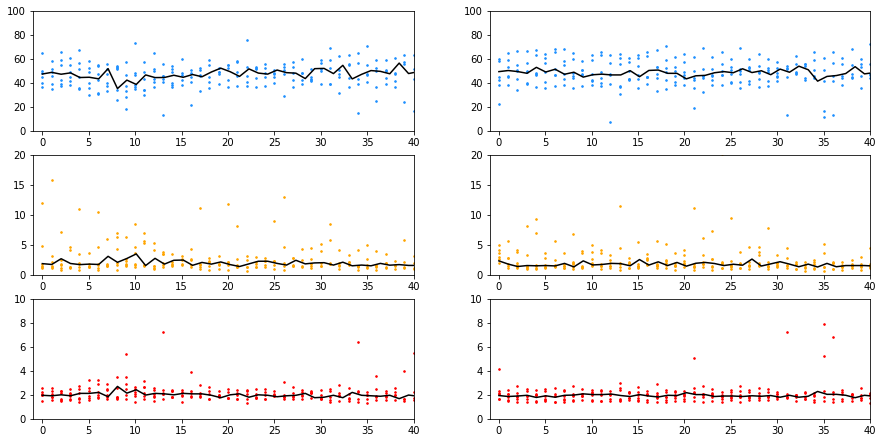

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(15,7.5))
animal, session = 'RatF01', 'RatF01_2022_05_12_15_16_48'
waitx10, waity10 = [], []
waitx90, waity90 = [], []
for bin in [_ for _ in range(0,12)]:
    y = []
    x = []
    c = 0
    for a in range(0, len(binseq[animal, session][bin])):
        if binseq[animal, session][bin][a][1] == "stay":
            x.append(c)
            y.append(binseq[animal, session][bin][a][3])
            c+=1

    if bin %2 == 0:
        axs[1, 1].scatter(x, y, c='orange', s=2.5)
        waitx90.append(x)
        waity90.append(y)
    else:
        axs[1, 0].scatter(x, y, c='orange', s=2.5)
        waitx10.append(x)
        waity10.append(y)

speedx10, speedy10 = [], []
speedx90, speedy90 = [], []
for bin in [_ for _ in range(0,12)]:
    y = []
    x = []
    c=0
    for a in range(0, len(binseq[animal, session][bin])):
        if binseq[animal, session][bin][a][1] == "run":
            x.append(c)
            y.append(abs(binseq[animal, session][bin][a][4]))
            c+=1

    if bin %2 == 0:
        axs[0, 1].scatter(x, y, c='dodgerblue', s=2.5)
        speedx90.append(x)
        speedy90.append(y)
    else:
        axs[0, 0].scatter(x, y, c='dodgerblue', s=2.5)
        speedx10.append(x)
        speedy10.append(y)

runx10, runy10 = [], []
runx90, runy90 = [], []
for bin in [_ for _ in range(0,12)]:
    y = []
    x = []
    c = 0
    for a in range(0, len(binseq[animal, session][bin])):
        if binseq[animal, session][bin][a][1] == "run":
            x.append(c)
            y.append(binseq[animal, session][bin][a][3])
            c+=1

    if bin %2 == 0:
        axs[2, 1].scatter(x, y, c='red', s=2.5)
        runx90.append(x)
        runy90.append(y)
    else:
        axs[2, 0].scatter(x, y, c='red', s=2.5)
        runx10.append(x)
        runy10.append(y)

a,b = compute_median(speedy10, speedx10, 100)
axs[0, 0].plot(a, b, c='k',)# s=2.5)
a,b = compute_median(waity10, waitx10, 100)
axs[1, 0].plot(a, b, c='k',)# s=2.5)
a,b = compute_median(runy10, runx10, 100)
axs[2, 0].plot(a, b, c='k',)# s=2.5)
a,b = compute_median(speedy90, speedx90, 100)
axs[0, 1].plot(a, b, c='k',)# s=2.5)
a,b = compute_median(waity90, waitx90, 100)
axs[1, 1].plot(a, b, c='k',)# s=2.5)
a,b = compute_median(runy90, runx90, 100)
axs[2, 1].plot(a, b, c='k',)# s=2.5)

xmax = 40
axs[0, 0].set_ylim(0,100)
axs[0, 0].set_xlim(-1,xmax)
axs[0, 1].set_ylim(0,100)
axs[0, 1].set_xlim(-1,xmax)
axs[1, 0].set_ylim(0,20)
axs[1, 0].set_xlim(-1,xmax)
axs[1, 1].set_ylim(0,20)
axs[1, 1].set_xlim(-1,xmax)
axs[2, 0].set_ylim(0,10)
axs[2, 0].set_xlim(-1,xmax)
axs[2, 1].set_ylim(0,10)
axs[2, 1].set_xlim(-1,xmax)

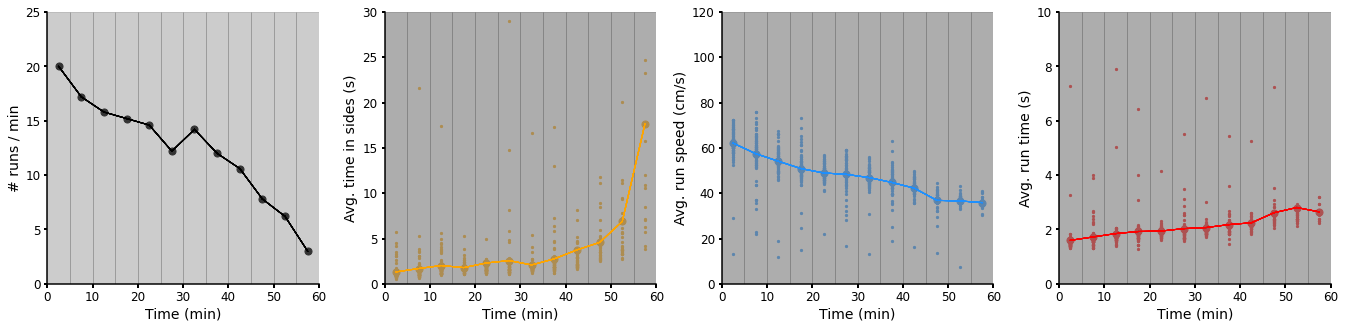

In [ ]:

aaa= animal
sss= session

fig = plt.figure(constrained_layout = False, figsize=(23, 5))
gs = fig.add_gridspec(5, 23)
ax70 = fig.add_subplot(gs[0:5, 0:5])
ax70 = plot_figBin([nb_runsBin[aaa, sss][i]/5 for i in range(0, 12)], params[aaa, sss]['rewardProbaBlock'], params[aaa, sss]['blocks'], barplotaxes = [0, params[aaa, sss]['sessionDuration']/60, 0, 25], color = ['k'], xyLabels=["Time (min)", "\u0023 runs / min", 14, 12], title=["", 16], linewidth = [1.5]);

ax72 = fig.add_subplot(gs[0:5, 6:11])
ax72 = plot_figBin([np.mean(timeStayInLeftBin[aaa, sss][i]+timeStayInRightBin[aaa, sss][i]) for i in range(0, 12)], params[aaa, sss]['rewardProbaBlock'], params[aaa, sss]['blocks'], barplotaxes = [0, params[aaa, sss]['sessionDuration']/60, 0, 30], color = ['orange'], xyLabels=["Time (min)","Avg. time in sides (s)", 14, 12], title=["", 16], linewidth = [1.5]);
ax72 = plot_figBinscatter([timeStayInLeftBin[aaa, sss][i]+timeStayInRightBin[aaa, sss][i] for i in range(0, 12)], params[aaa, sss]['rewardProbaBlock'], params[aaa, sss]['blocks'], barplotaxes = [0, params[aaa, sss]['sessionDuration']/60, 0, 30], color = ['orange'], xyLabels=["Time (min)","Avg. time in sides (s)", 14, 12], title=["", 16], linewidth = [1.5]);

ax74 = fig.add_subplot(gs[0:5, 12:17])
ax74 = plot_figBin([np.mean(speedRunToLeftBin[aaa, sss][i]+speedRunToRightBin[aaa, sss][i]) for i in range(0, 12)], params[aaa, sss]['rewardProbaBlock'], params[aaa, sss]['blocks'], barplotaxes = [0, params[aaa, sss]['sessionDuration']/60, 0, 120], color = ['dodgerblue'], xyLabels=["Time (min)","Avg. run speed (cm/s)", 14, 12], title=["", 16], linewidth = [1.5]);
ax74 = plot_figBinscatter([speedRunToLeftBin[aaa, sss][i]+speedRunToRightBin[aaa, sss][i] for i in range(0, 12)], params[aaa, sss]['rewardProbaBlock'], params[aaa, sss]['blocks'], barplotaxes = [0, params[aaa, sss]['sessionDuration']/60, 0, 120], color = ['dodgerblue'], xyLabels=["Time (min)","Avg. run speed (cm/s)", 14, 12], title=["", 16], linewidth = [1.5]);

ax76 = fig.add_subplot(gs[0:5, 18:23])
ax76 = plot_figBin([np.mean(timeRunToLeftBin[aaa, sss][i]+timeRunToRightBin[aaa, sss][i]) for i in range(0, 12)], params[aaa, sss]['rewardProbaBlock'], params[aaa, sss]['blocks'], barplotaxes = [0, params[aaa, sss]['sessionDuration']/60, 0, 10], color = ['red'], xyLabels=["Time (min)", "Avg. run time (s)", 14, 12], title=["", 16], linewidth = [1.5]);
ax76 = plot_figBinscatter([timeRunToLeftBin[aaa, sss][i]+timeRunToRightBin[aaa, sss][i] for i in range(0, 12)], params[aaa, sss]['rewardProbaBlock'], params[aaa, sss]['blocks'], barplotaxes = [0, params[aaa, sss]['sessionDuration']/60, 0, 10], color = ['red'], xyLabels=["Time (min)", "Avg. run time (s)", 14, 12], title=["", 16], linewidth = [1.5]);


#save_plot_as_png('blockplots', dpi = 300, transparent = True, background = 'auto')

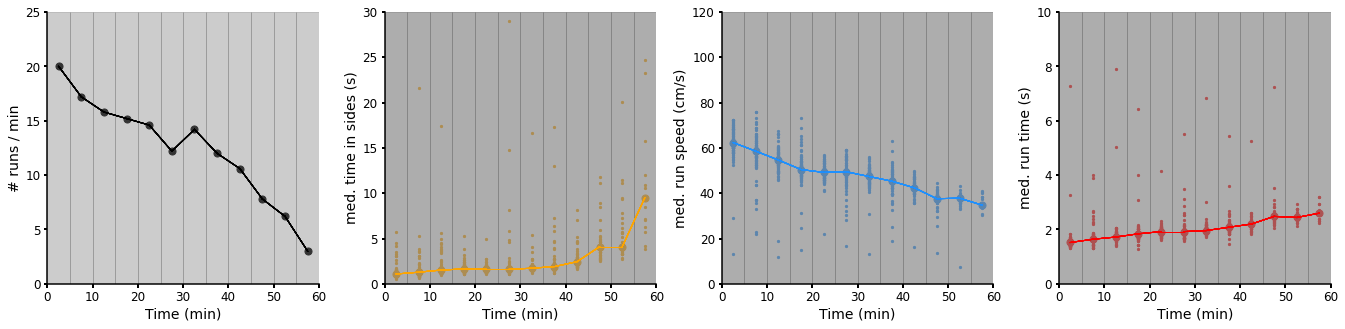

In [ ]:
aaa= animal
sss= session

# aaa= 'RatM01'
# sss= 'RatM01_2021_07_22_12_26_37'

fig = plt.figure(constrained_layout = False, figsize=(23, 5))
gs = fig.add_gridspec(5, 23)
ax70 = fig.add_subplot(gs[0:5, 0:5])
ax70 = plot_figBin([nb_runsBin[aaa, sss][i]/5 for i in range(0, 12)], params[aaa, sss]['rewardProbaBlock'], params[aaa, sss]['blocks'], barplotaxes = [0, params[aaa, sss]['sessionDuration']/60, 0, 25], color = ['k'], xyLabels=["Time (min)", "\u0023 runs / min", 14, 12], title=["", 16], linewidth = [1.5]);
ax72 = fig.add_subplot(gs[0:5, 6:11])
ax72 = plot_figBin([np.median(timeStayInLeftBin[aaa, sss][i]+timeStayInRightBin[aaa, sss][i]) for i in range(0, 12)], params[aaa, sss]['rewardProbaBlock'], params[aaa, sss]['blocks'], barplotaxes = [0, params[aaa, sss]['sessionDuration']/60, 0, 30], color = ['orange'], xyLabels=["Time (min)","med. time in sides (s)", 14, 12], title=["", 16], linewidth = [1.5]);
ax72 = plot_figBinscatter([timeStayInLeftBin[aaa, sss][i]+timeStayInRightBin[aaa, sss][i] for i in range(0, 12)], params[aaa, sss]['rewardProbaBlock'], params[aaa, sss]['blocks'], barplotaxes = [0, params[aaa, sss]['sessionDuration']/60, 0, 30], color = ['orange'], xyLabels=["Time (min)","med. time in sides (s)", 14, 12], title=["", 16], linewidth = [1.5]);

ax74 = fig.add_subplot(gs[0:5, 12:17])
ax74 = plot_figBin([np.median(speedRunToLeftBin[aaa, sss][i]+speedRunToRightBin[aaa, sss][i]) for i in range(0, 12)], params[aaa, sss]['rewardProbaBlock'], params[aaa, sss]['blocks'], barplotaxes = [0, params[aaa, sss]['sessionDuration']/60, 0, 120], color = ['dodgerblue'], xyLabels=["Time (min)","med. run speed (cm/s)", 14, 12], title=["", 16], linewidth = [1.5]);
ax74 = plot_figBinscatter([speedRunToLeftBin[aaa, sss][i]+speedRunToRightBin[aaa, sss][i] for i in range(0, 12)], params[aaa, sss]['rewardProbaBlock'], params[aaa, sss]['blocks'], barplotaxes = [0, params[aaa, sss]['sessionDuration']/60, 0, 120], color = ['dodgerblue'], xyLabels=["Time (min)","med. run speed (cm/s)", 14, 12], title=["", 16], linewidth = [1.5]);

ax76 = fig.add_subplot(gs[0:5, 18:23])
ax76 = plot_figBin([np.median(timeRunToLeftBin[aaa, sss][i]+timeRunToRightBin[aaa, sss][i]) for i in range(0, 12)], params[aaa, sss]['rewardProbaBlock'], params[aaa, sss]['blocks'], barplotaxes = [0, params[aaa, sss]['sessionDuration']/60, 0, 10], color = ['red'], xyLabels=["Time (min)", "med. run time (s)", 14, 12], title=["", 16], linewidth = [1.5]);
ax76 = plot_figBinscatter([timeRunToLeftBin[aaa, sss][i]+timeRunToRightBin[aaa, sss][i] for i in range(0, 12)], params[aaa, sss]['rewardProbaBlock'], params[aaa, sss]['blocks'], barplotaxes = [0, params[aaa, sss]['sessionDuration']/60, 0, 10], color = ['red'], xyLabels=["Time (min)", "med. run time (s)", 14, 12], title=["", 16], linewidth = [1.5]);

In [ ]:
def plot_figBinscatter(data, rewardProbaBlock, blocks, barplotaxes, color, xyLabels=["Speed cm/s","Quantity", "Direction", "Speed(cm/s)"], title=[None], linewidth = 1):
    # warnings.simplefilter("ignore", category=RuntimeWarning)
    binplot = plt.gca()

    for i in range(0, len(blocks)):
        plt.axvspan(blocks[i][0]/60, blocks[i][1]/60, color='grey', alpha=rewardProbaBlock[i]/250, label = "%reward: " + str(rewardProbaBlock[i]) if (i == 0 or i == 1) else "")
        plt.scatter(np.full((len(data[i])), (blocks[i][1] + blocks[i][0])/120), data[i], s=5, color = color[0])

    # binplot.set_title(title[0], fontsize = title[1])
    # binplot.set_xlabel(xyLabels[0], fontsize = xyLabels[2])
    # binplot.set_ylabel(xyLabels[1], fontsize = xyLabels[2])
    # binplot.set_xlim([barplotaxes[0], barplotaxes[1]])
    # binplot.set_ylim([barplotaxes[2], barplotaxes[3]])
    # binplot.spines['bottom'].set_linewidth(linewidth[0])
    # binplot.spines['left'].set_linewidth(linewidth[0])
    # binplot.spines['top'].set_color("none")
    # binplot.spines['right'].set_color("none")
    # binplot.tick_params(width=2, labelsize = xyLabels[3])
    return binplot
